## **Import important libraries**

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Load Dataset**

In [2]:
try:
    url = '/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv'
    df=pd.read_csv(url)
except FileNotFoundError:
    print("The file 'nearest-earth-objects(1910-2024).csv' was not found.")
    exit()
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


## **EDA**

In [3]:
df.shape

(338199, 9)

In [4]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [6]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [7]:
# check what every column have
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

neo_id : 33514
neo_id
2277810     211
2469219     197
3678630     192
3771633     186
54353620    169
Name: count, dtype: int64

********************

name : 33514
name
277810 (2006 FV35)               211
469219 Kamo`oalewa (2016 HO3)    197
(2014 OL339)                     192
(2017 FZ2)                       186
(2023 FW13)                      169
Name: count, dtype: int64

********************

absolute_magnitude : 1778
absolute_magnitude
24.4    2208
26.1    2088
24.6    2083
25.5    2048
24.8    2038
Name: count, dtype: int64

********************

estimated_diameter_min : 1778
estimated_diameter_min
0.035039    2208
0.016016    2088
0.031956    2083
0.021113    2048
0.029144    2038
Name: count, dtype: int64

********************

estimated_diameter_max : 1778
estimated_diameter_max
0.078350    2208
0.035813    2088
0.071456    2083
0.047211    2048
0.065169    2038
Name: count, dtype: int64

********************

orbiting_body : 1
orbiting_body
Earth    338199
Name: count, dty

In [8]:
df.describe(include = 'all')

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
count,3.381990e+05,338199,338171.000000,338171.000000,338171.000000,338199,338199.000000,3.381990e+05,338199
unique,NaN,33514,NaN,NaN,NaN,1,NaN,NaN,2
top,NaN,277810 (2006 FV35),NaN,NaN,NaN,Earth,NaN,NaN,False
freq,NaN,211,NaN,NaN,NaN,338199,NaN,NaN,295037
mean,1.759939e+07,NaN,22.932525,0.157812,0.352878,NaN,51060.662908,4.153535e+07,NaN
std,2.287225e+07,NaN,2.911216,0.313885,0.701869,NaN,26399.238435,2.077399e+07,NaN
min,2.000433e+06,NaN,9.250000,0.000511,0.001143,NaN,203.346433,6.745533e+03,NaN
25%,3.373980e+06,NaN,20.740000,0.025384,0.056760,NaN,30712.031471,2.494540e+07,NaN
50%,3.742127e+06,NaN,22.800000,0.073207,0.163697,NaN,47560.465474,4.332674e+07,NaN
75%,5.405374e+07,NaN,25.100000,0.189041,0.422708,NaN,66673.820614,5.933961e+07,NaN


In [9]:
# check nulls
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [10]:
# Handle missing values by filling with the mean for numerical columns
df['absolute_magnitude'].fillna(df['absolute_magnitude'].mean(), inplace=True)
df['estimated_diameter_min'].fillna(df['estimated_diameter_min'].mean(), inplace=True)
df['estimated_diameter_max'].fillna(df['estimated_diameter_max'].mean(), inplace=True)

In [11]:
df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
sns.set_palette("viridis") 
sns.set_theme(style="darkgrid")

In [14]:
type_value =df['is_hazardous'].value_counts()
type_value

is_hazardous
False    295037
True      43162
Name: count, dtype: int64

### **Distribution of Hazardous vs Non-Hazardous NEOs**

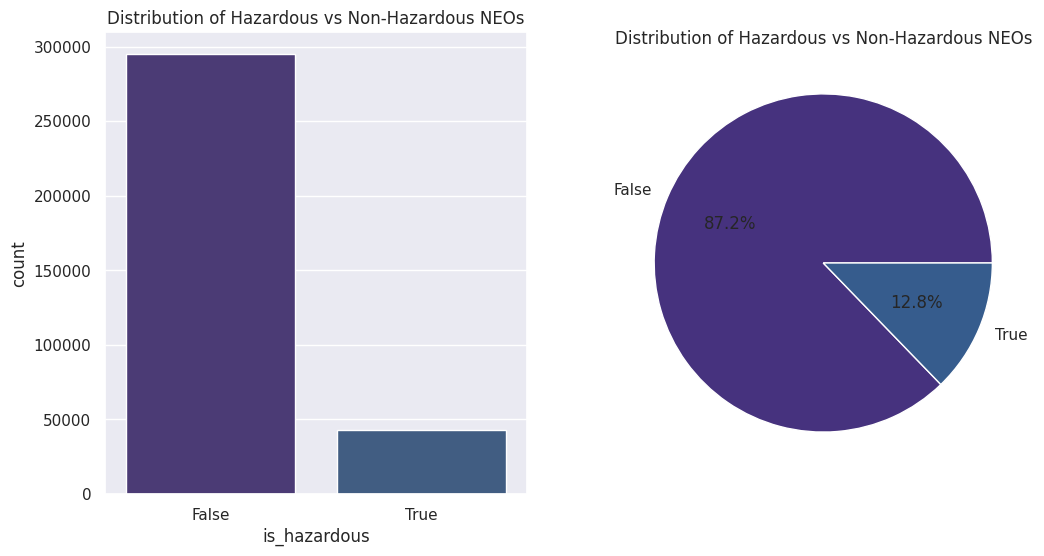

In [15]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot for types of content
palette = sns.color_palette('viridis')  # Get the color palette
sns.countplot(data=df, x='is_hazardous', palette=palette, ax=axes[0])
axes[0].set_title('Distribution of Hazardous vs Non-Hazardous NEOs')

# Pie chart for types of content
axes[1].pie(type_value, labels=type_value.index, autopct='%1.1f%%', colors=palette)
axes[1].set_title('Distribution of Hazardous vs Non-Hazardous NEOs')

# Show the plots
plt.show()

### **Correlation Matrix**

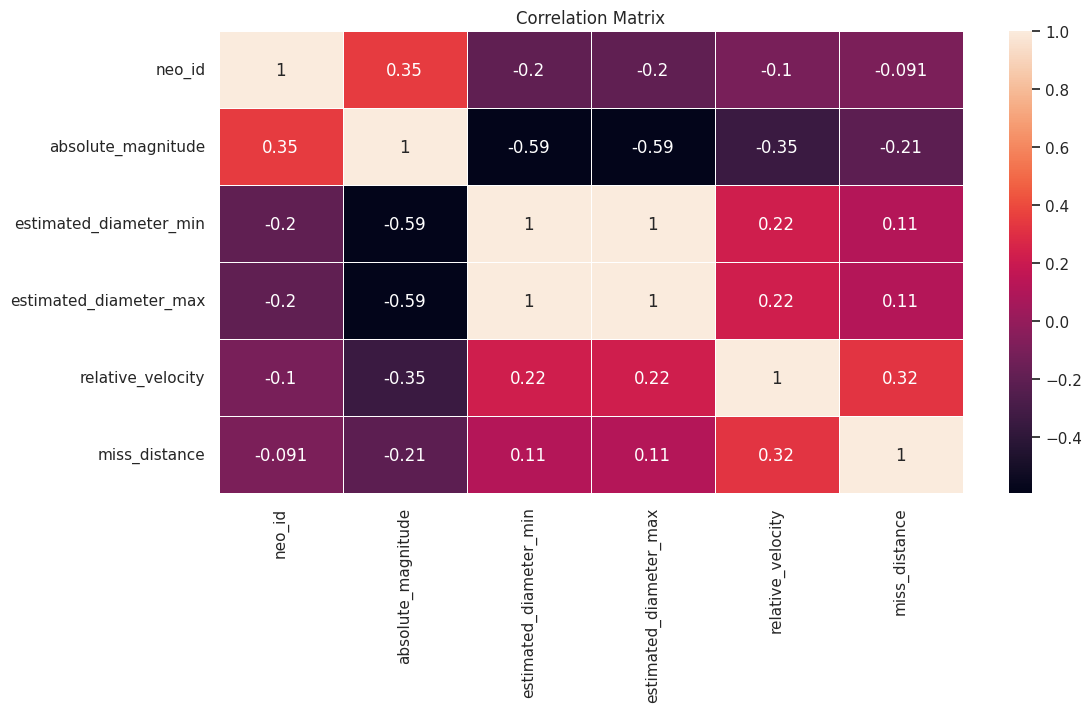

In [16]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(12, 6))
corr_matrix = numeric_data.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### **Distribution of Absolute Magnitude**

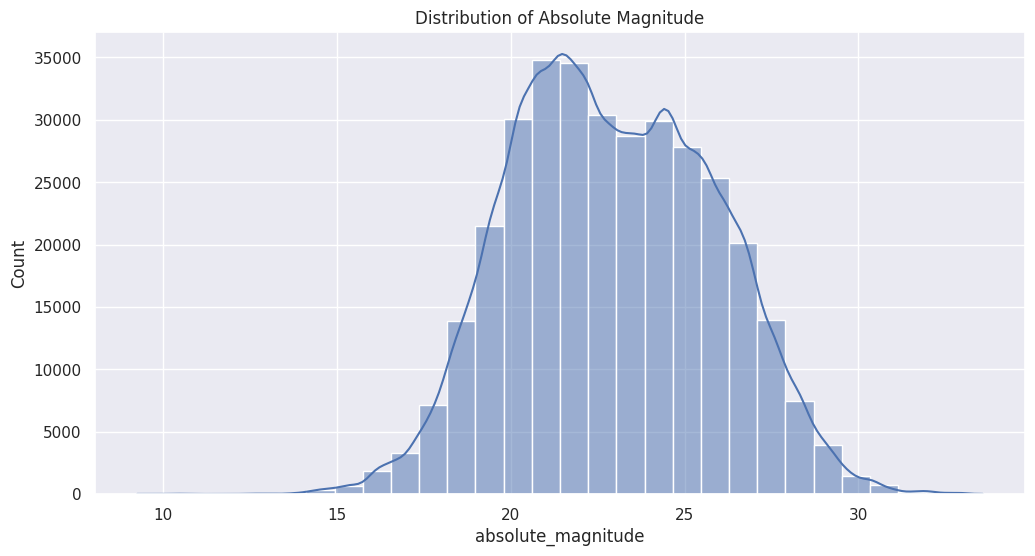

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df['absolute_magnitude'], bins=30, kde=True)
plt.title('Distribution of Absolute Magnitude')
plt.show()

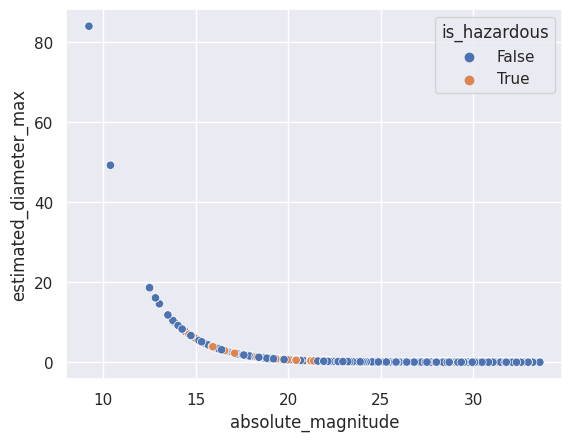

In [18]:
sns.scatterplot(data=df, y="estimated_diameter_max", x="absolute_magnitude", hue="is_hazardous")
plt.show()

## **Machien Learning Models**

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import roc_curve, auc

In [20]:
df.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

In [21]:
# Encoding the 'orbiting_body' column
label_encoder = LabelEncoder()
df['orbiting_body'] = label_encoder.fit_transform(df['orbiting_body'])

In [22]:
# Features selection and training
X = df.drop(['neo_id', 'name', 'is_hazardous'], axis=1)
y = df['is_hazardous']

In [23]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# # Handle imbalanced classes using SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [25]:
# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

### **Logistic Regression**

In [26]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train_resampled)

LogisticRegression(random_state=42)

In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy}')
print("Logistic Regression Report")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Validation Accuracy: 0.7391188645771732
Logistic Regression Report
              precision    recall  f1-score   support

       False       0.98      0.72      0.83     88468
        True       0.31      0.88      0.46     12992

    accuracy                           0.74    101460
   macro avg       0.64      0.80      0.65    101460
weighted avg       0.89      0.74      0.78    101460

Confusion Matrix:
[[63595 24873]
 [ 1596 11396]]


### **Random Forest**

In [28]:
R_model = RandomForestClassifier(random_state=42)
R_model.fit(X_train, y_train_resampled)

RandomForestClassifier(random_state=42)

In [29]:
Y_pred = R_model.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred)
print(f'Validation Accuracy: {accuracy}')
print("Random Forest Report")
print(classification_report(y_test, Y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, Y_pred))

Validation Accuracy: 0.9121032919377094
Random Forest Report
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     88468
        True       0.66      0.66      0.66     12992

    accuracy                           0.91    101460
   macro avg       0.80      0.80      0.80    101460
weighted avg       0.91      0.91      0.91    101460

Confusion Matrix:
[[83999  4469]
 [ 4449  8543]]


**AS We Notice Random Forest Do Much Better The Logistic Regression**

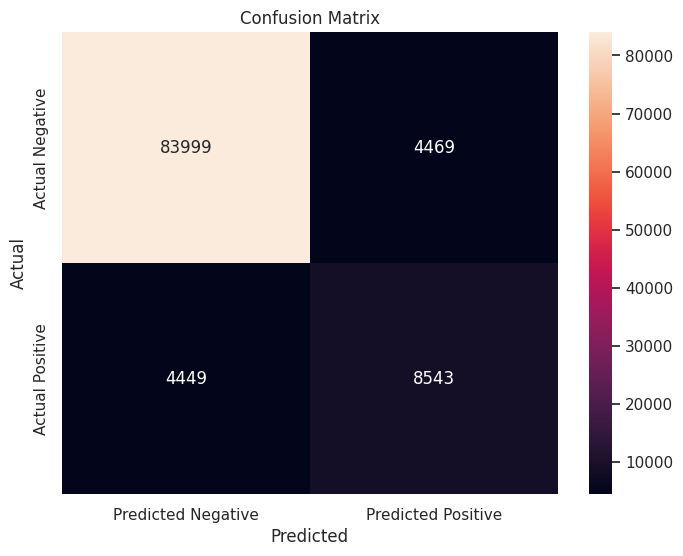

In [30]:
cm = confusion_matrix(y_test, Y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

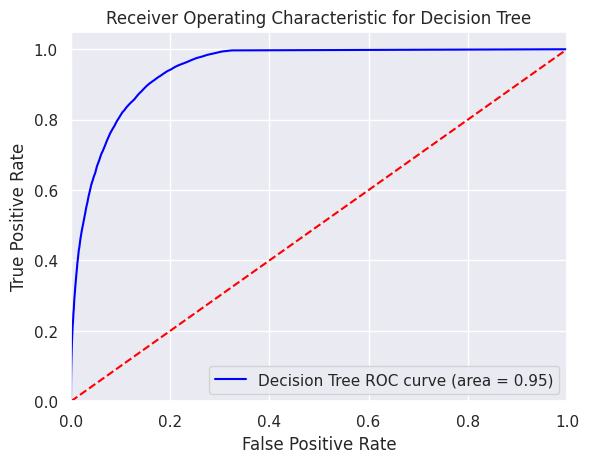

In [31]:
# plot ROC for Decision Tree
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, R_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='Decision Tree ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc='lower right')
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------**

### **Compare Between 3 Models**

In [32]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
}

In [33]:
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train_resampled, cv=5, scoring='accuracy')
    results[name] = {
        'Mean CV Accuracy': scores.mean(),
        'Std Dev': scores.std()
    }
    print(f'{name} - Mean CV Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}')

best_model_name = max(results, key=lambda k: results[k]['Mean CV Accuracy'])
best_model_info = results[best_model_name]

print("\nBest Model:")
print(f"{best_model_name} - Mean CV Accuracy: {best_model_info['Mean CV Accuracy']:.4f}, Std Dev: {best_model_info['Std Dev']:.4f}")


Logistic Regression - Mean CV Accuracy: 0.8107, Std Dev: 0.0061
Decision Tree - Mean CV Accuracy: 0.9074, Std Dev: 0.0984
KNN - Mean CV Accuracy: 0.8519, Std Dev: 0.0064

Best Model:
Decision Tree - Mean CV Accuracy: 0.9074, Std Dev: 0.0984


In [34]:
DTModel = DecisionTreeClassifier()
DTModel.fit(X_train, y_train_resampled)
y_pred = DTModel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy}')

print("Decision Tree Report")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Validation Accuracy: 0.8995564754583087
Decision Tree Report
              precision    recall  f1-score   support

       False       0.95      0.94      0.94     88468
        True       0.60      0.63      0.62     12992

    accuracy                           0.90    101460
   macro avg       0.77      0.78      0.78    101460
weighted avg       0.90      0.90      0.90    101460

Confusion Matrix:
[[83076  5392]
 [ 4799  8193]]


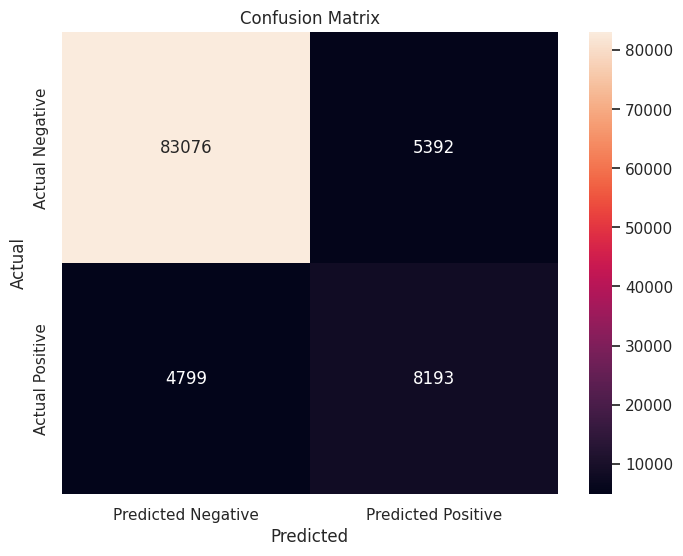

In [35]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

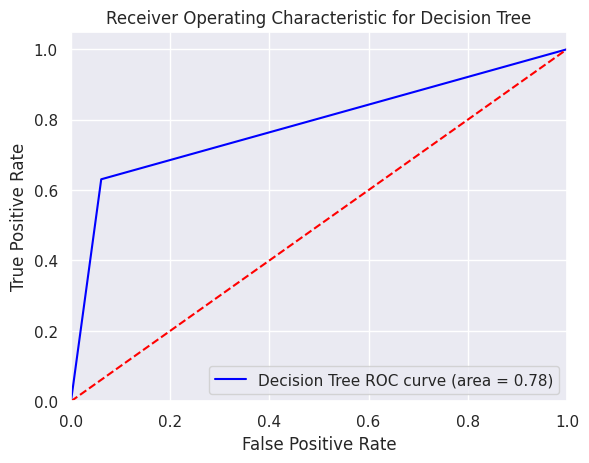

In [36]:
# plot ROC for Decision Tree
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, DTModel.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='Decision Tree ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc='lower right')
plt.show()

## **Thanks...**